In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import keras

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
application_df.INCOME_AMT.unique()

array(['0', '1-9999', '10000-24999', '100000-499999', '10M-50M',
       '25000-99999', '50M+', '1M-5M', '5M-10M'], dtype=object)

In [5]:
application_df.ASK_AMT.min(), application_df.ASK_AMT.max()

(5000, 8597806340)

<AxesSubplot:ylabel='Frequency'>

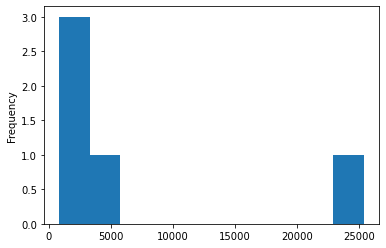

In [6]:
import numpy as np
bins = [0, 5001, 3e4, 6e5, 3e6, np.inf]
names = ['<5001', '5e3-3e4', '3e4-6e5', '6e5-3e6', '3e6+']
askamt_bins = pd.cut(application_df.ASK_AMT, bins, labels=names)
askamt_bins.value_counts().plot.hist()

In [7]:
application_df['ASK_AMT_BINS'] = askamt_bins
application_df = application_df.drop(['ASK_AMT'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,ASK_AMT_BINS
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1,<5001
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1,3e4-6e5
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,<5001
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1,5e3-3e4
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1,3e4-6e5


In [8]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

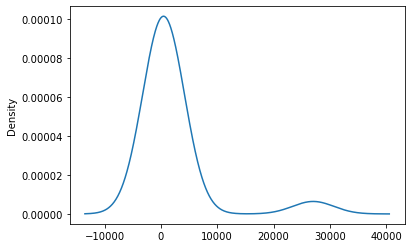

In [9]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
application_type_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application_type = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application_type:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

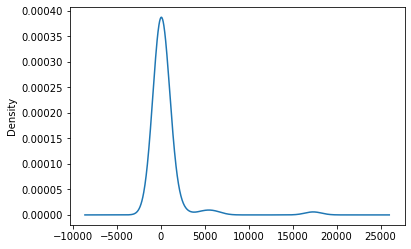

In [12]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
classification_counts.plot.density()

In [13]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_classification = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [14]:
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [15]:
application_df.dtypes[application_df.dtypes == "object"].index.tolist()

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [16]:
application_df.dtypes.filter(items = ['object'])

Series([], dtype: object)

In [17]:
(application_df.dtypes == "object") | (application_df.dtypes == "category")

APPLICATION_TYPE           True
AFFILIATION                True
CLASSIFICATION             True
USE_CASE                   True
ORGANIZATION               True
STATUS                    False
INCOME_AMT                 True
SPECIAL_CONSIDERATIONS     True
IS_SUCCESSFUL             False
ASK_AMT_BINS               True
dtype: bool

In [18]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = application_df.dtypes[(application_df.dtypes == "object") | (application_df.dtypes == "category")].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT_BINS']

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\lt\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_BINS_3e4-6e5,ASK_AMT_BINS_3e6+,ASK_AMT_BINS_5e3-3e4,ASK_AMT_BINS_6e5-3e6,ASK_AMT_BINS_<5001
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, axis=1)
application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_BINS_3e4-6e5,ASK_AMT_BINS_3e6+,ASK_AMT_BINS_5e3-3e4,ASK_AMT_BINS_6e5-3e6,ASK_AMT_BINS_<5001
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=78)

In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_val_scaled, X_test_scaled, y_val, y_test = train_test_split(X_test_scaled, y_test, test_size=0.5, random_state=78)

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 384       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", 
           optimizer=keras.optimizers.Adam(learning_rate=0.001), #learning_rate=1.0), 
           metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [25]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,
                   y_train,
                   epochs=50,
                   callbacks=[cp_callback],
                   validation_data = (X_test_scaled, y_test))

Epoch 1/50
719/719 [==============================] - 2s 1ms/step - loss: 0.6448 - accuracy: 0.6800 - val_loss: 0.5987 - val_accuracy: 0.7219
Epoch 2/50
719/719 [==============================] - 1s 1ms/step - loss: 0.5906 - accuracy: 0.7253 - val_loss: 0.5844 - val_accuracy: 0.7269
Epoch 3/50
719/719 [==============================] - 1s 1ms/step - loss: 0.5801 - accuracy: 0.7282 - val_loss: 0.5789 - val_accuracy: 0.7265
Epoch 4/50
719/719 [==============================] - 1s 1ms/step - loss: 0.5748 - accuracy: 0.7289 - val_loss: 0.5754 - val_accuracy: 0.7263
Epoch 5/50
702/719 [============================>.] - ETA: 0s - loss: 0.5710 - accuracy: 0.7293
Epoch 5: saving model to checkpoints\weights.05.hdf5
719/719 [==============================] - 1s 1ms/step - loss: 0.5715 - accuracy: 0.7290 - val_loss: 0.5735 - val_accuracy: 0.7272
Epoch 6/50
719/719 [==============================] - 1s 1ms/step - loss: 0.5690 - accuracy: 0.7288 - val_loss: 0.5720 - val_accuracy: 0.7281
Epoch 7/50

719/719 [==============================] - 1s 1ms/step - loss: 0.5480 - accuracy: 0.7318 - val_loss: 0.5532 - val_accuracy: 0.7299
Epoch 50/50
674/719 [===========================>..] - ETA: 0s - loss: 0.5459 - accuracy: 0.7338
Epoch 50: saving model to checkpoints\weights.50.hdf5
719/719 [==============================] - 1s 1ms/step - loss: 0.5474 - accuracy: 0.7324 - val_loss: 0.5541 - val_accuracy: 0.7272


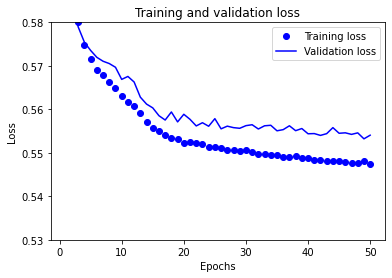

In [26]:
import matplotlib.pyplot as plt
history_dict = fit_model.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.ylim([0.53, 0.58])
plt.savefig('./analysis/loss.png')
plt.show()

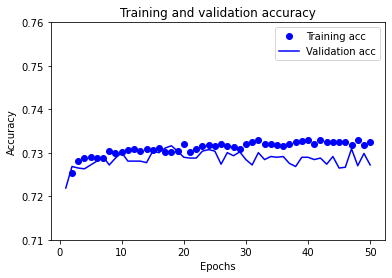

In [27]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.ylim([0.71, 0.76])
plt.savefig('./analysis/acc.png')
plt.show()

In [28]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

177/177 - 0s - loss: 0.5541 - accuracy: 0.7272 - 146ms/epoch - 826us/step
Loss: 0.5540533661842346, Accuracy: 0.7272084951400757
